Thành viên:
Nguyễn Hoàng Linh - 52100907

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from tensorflow.keras.layers import SimpleRNN

1) Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;

    Bài toán: Dự đoán tỉ lệ sống sót của hành khách trên tàu Titanic

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


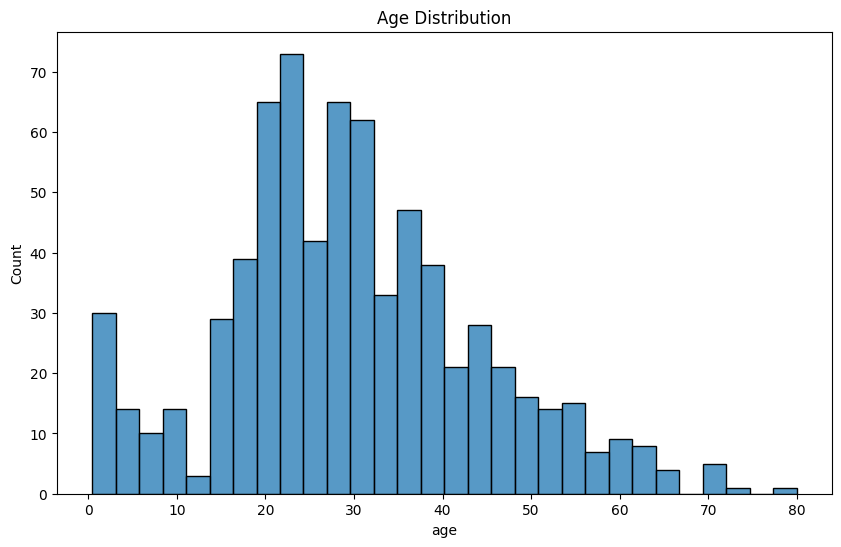

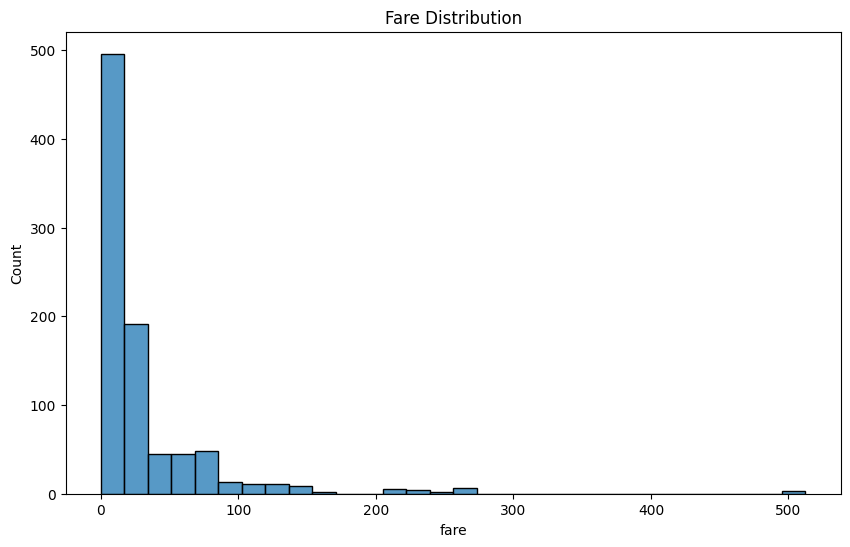

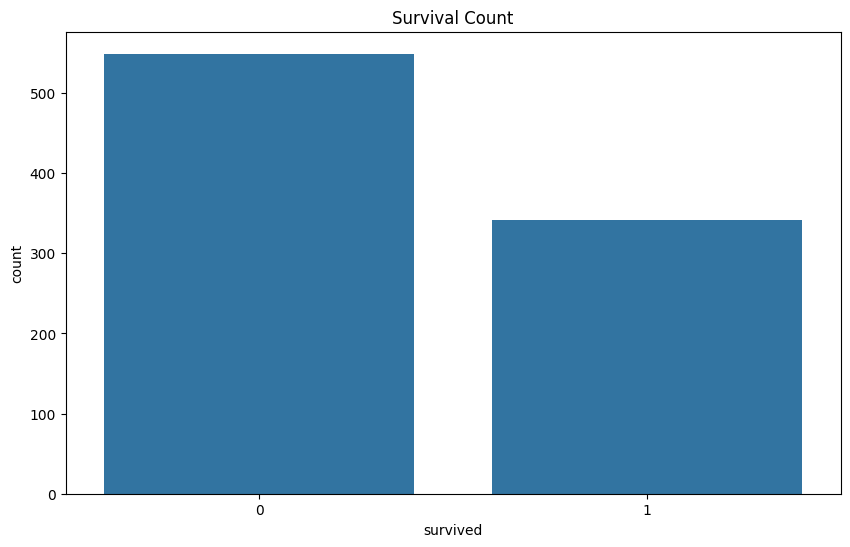

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


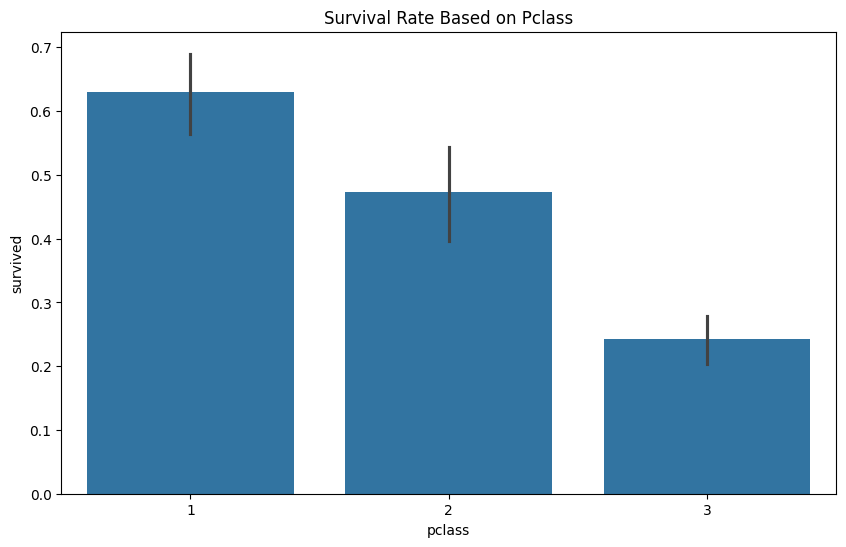

In [3]:
# Tải dữ liệu từ file csv
df = pd.read_csv('titanic.csv')

# Thống kê dữ liệu
print(df.describe())

# Vẽ histogram cho cột 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=False, bins=30)
plt.title('Age Distribution')
plt.show()

# Vẽ histogram cho cột 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], kde=False, bins=30)
plt.title('Fare Distribution')
plt.show()

# Vẽ biểu đồ cột cho số người sống sót
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Đánh giá vai trò của các đặc điểm cho mục tiêu của vấn đề
# Tỷ lệ sống sót dựa trên đăc điểm 'Pclass'
survival_rate = df.groupby('pclass')['survived'].mean()
print(survival_rate)

# Vẽ biểu đồ cột cho tỷ lệ sống sót dựa trên đăc điểm 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate Based on Pclass')
plt.show()

2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;

In [4]:
# Xử lý dữ liệu
df = df.dropna()
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Tạo Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

# Feature selection
selector = RFE(clf, n_features_to_select=3, step=1)
X = selector.fit_transform(X, y)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

# Dự đoán kết quả
y_pred = clf.predict(X_test)

# Đánh giá mô hình
print('Accuracy Score', accuracy_score(y_test, y_pred))

# Tạo mô hình học máy Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Tạo mô hình học máy Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

# Tạo mô hình học máy Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Đánh giá mô hình
logreg_score = logreg.score(X_test, y_test)
svm_score = svm.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print('Logistic Regression Accuracy:', logreg_score)
print('Support Vector Machine Accuracy:', svm_score)
print('Decision Tree Accuracy:', dt_score)


Cross-Validation Accuracy Scores [0.72972973 0.7027027  0.69444444 0.69444444 0.69444444]
Accuracy Score 0.7297297297297297
Logistic Regression Accuracy: 0.7297297297297297
Support Vector Machine Accuracy: 0.6486486486486487
Decision Tree Accuracy: 0.5675675675675675


3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;

4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán;

    Các kỹ thuật để tránh overfitting là: regularization, dropout, early stopping, cross validation, feature selection, data augmentation, batch normalization, transfer learning, ensemble learning,...

5)	Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không. 

    Để có thể cải thiện độ chính xác của mô hình, ta có thể thực hiện các điều sau:

    Phân tích lỗi: Xem xét các trường hợp mà mô hình dự đoán sai. Điều này có thể giúp hiểu được mô hình mắc lỗi ở đâu và tại sao.

    Tinh chỉnh tham số (Hyperparameter tuning): Các mô hình học máy thường có nhiều tham số có thể điều chỉnh. Có thể thử nghiệm với các giá trị khác nhau của các tham số để xem liệu có thể cải thiện hiệu suất của mô hình hay không.

    Sử dụng kỹ thuật Ensemble Learning: Ensemble Learning là việc kết hợp nhiều mô hình học máy để cải thiện hiệu suất.

    Thêm dữ liệu huấn luyện: Việc thêm dữ liệu huấn luyện có thể giúp cải thiện hiệu suất của mô hình.

    Feature engineering: Đây là quá trình tạo ra các đặc trưng mới từ dữ liệu hiện có, hoặc biến đổi các đặc trưng hiện tại để chúng có thể giúp mô hình dự đoán chính xác hơn.



In [5]:
model = Sequential()

# Thêm Dense Layer với L1 regularization và dropout
model.add(Dense(32, activation='relu',
          input_dim=X_train.shape[1], kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l1(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Định nghĩa callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit mô hình với early stopping
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_split=0.2, callbacks=[early_stopping])



Epoch 1/10
4/4 [==============================] - 1s 56ms/step - loss: 9.9344 - accuracy: 0.5776 - val_loss: 3.3099 - val_accuracy: 0.7586
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 6.9409 - accuracy: 0.6466 - val_loss: 3.0773 - val_accuracy: 0.7586
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 6.4727 - accuracy: 0.5431 - val_loss: 2.9739 - val_accuracy: 0.7586
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 8.2406 - accuracy: 0.5172 - val_loss: 2.9169 - val_accuracy: 0.7586
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 6.5177 - accuracy: 0.6121 - val_loss: 2.8268 - val_accuracy: 0.7586
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 6.8002 - accuracy: 0.5862 - val_loss: 2.7051 - val_accuracy: 0.7586
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 6.7988 - accuracy: 0.5259 - val_loss: 2.5994 - val_accuracy: 0.7586
Epoch 8/10
4/4 [================

In [6]:
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential()

# Thêm một SimpleRNN layer với L1 regularization
model.add(SimpleRNN(32, input_shape=(
    X_train_rnn.shape[1], X_train_rnn.shape[2]), kernel_regularizer=regularizers.l1(0.01)))

# Thêm Dropout layer
model.add(Dropout(0.5))

# Thêm Dense layer với L1 regularization
model.add(Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l1(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Định nghĩa callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit mô hình với early stopping
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32,
          validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
4/4 [==============================] - 1s 63ms/step - loss: 1.4463 - accuracy: 0.3017 - val_loss: 1.2138 - val_accuracy: 0.2414
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 1.3305 - accuracy: 0.3448 - val_loss: 1.1454 - val_accuracy: 0.2414
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 1.3445 - accuracy: 0.3793 - val_loss: 1.0827 - val_accuracy: 0.2414
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 1.1719 - accuracy: 0.4741 - val_loss: 1.0235 - val_accuracy: 0.2414
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0235 - accuracy: 0.5259 - val_loss: 0.9707 - val_accuracy: 0.2414
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 1.1174 - accuracy: 0.3966 - val_loss: 0.9257 - val_accuracy: 0.2414
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 1.0271 - accuracy: 0.4569 - val_loss: 0.8850 - val_accuracy: 0.3793
Epoch 8/10
4/4 [===========

In [7]:
# Reshape X_train về dạng 3D
X_train_lstm = np.array(X_train).reshape(
    (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()

# Thêm LSTM layer với L1 regularization
model.add(LSTM(32, input_shape=(
    X_train_lstm.shape[1], X_train_lstm.shape[2]), kernel_regularizer=regularizers.l1(0.01)))

# Thêm Dropout layer
model.add(Dropout(0.5))

# Thêm Dense layer với L1 regularization
model.add(Dense(1, activation='sigmoid',
          kernel_regularizer=regularizers.l1(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy',
                metrics=['accuracy'])

# Định nghĩa callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit mô hình với early stopping
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32,
          validation_split=0.2, callbacks=[early_stopping])



Epoch 1/10
4/4 [==============================] - 2s 114ms/step - loss: 1.4616 - accuracy: 0.3276 - val_loss: 1.4197 - val_accuracy: 0.2414
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 1.3450 - accuracy: 0.3707 - val_loss: 1.3248 - val_accuracy: 0.2414
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 1.2956 - accuracy: 0.3448 - val_loss: 1.2323 - val_accuracy: 0.2414
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 1.3248 - accuracy: 0.3190 - val_loss: 1.1414 - val_accuracy: 0.2414
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 1.1400 - accuracy: 0.3621 - val_loss: 1.0570 - val_accuracy: 0.2414
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 1.0587 - accuracy: 0.3966 - val_loss: 0.9847 - val_accuracy: 0.2414
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 1.0030 - accuracy: 0.4569 - val_loss: 0.9223 - val_accuracy: 0.3448
Epoch 8/10
4/4 [==========